## Import libraries

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1,2,3,4,5,6,7"
import json
import torch
import numpy as np
import torch.nn as nn
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = False
from pathlib import Path
from types import SimpleNamespace
from importlib import import_module

import cfg
from Utils.dataloader import *
from Utils.helpers import *
from models.parsecaps import *

%matplotlib inline


/home/gengxinyu/anaconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

from Utils.plot_utils import show_explainations, show_prototypes, plot_lambda_accuracy, get_comparison_plot

## Configuration

In [3]:
plt.style.use('seaborn-notebook')

## Load Data and Config

In [4]:
DATASET = 'mini_imagenet'

if DATASET == 'Cifar10':
    train_loader, test_loader, img_size, num_class, in_channel, image_shape = Cifar10(data_path=cfg.DATASET_FOLDER,
                                                               batch_size=cfg.BATCH_SIZE,
                                                               shuffle=True)()
elif DATASET == 'MNIST':
    train_loader, test_loader, img_size, num_class, in_channel, image_shape = MNIST(data_path=cfg.DATASET_FOLDER,
                                                               batch_size=cfg.BATCH_SIZE,
                                                               shuffle=True)()
elif DATASET == 'BrainTumor':
    train_loader, test_loader, img_size, num_class, in_channel, image_shape = BrainTumor(data_path=cfg.DATASET_FOLDER,
                                                               batch_size=cfg.BATCH_SIZE,
                                                               shuffle=True)()  
elif DATASET == 'mini_imagenet':
    train_loader, test_loader, img_size, num_class, in_channel, image_shape = mini_imagenet(data_path=cfg.DATASET_FOLDER,
                                                            batch_size=cfg.BATCH_SIZE,
                                                            shuffle=True)()
else:
    assert False, "Dataset not found!"

Using 8 dataloader workers every process


In [5]:
img_size=img_size
device=get_device() 
learning_rate=cfg.LEARNING_RATE
num_epochs=cfg.NUM_EPOCHS
decay_step=cfg.DECAY_STEP
gamma=cfg.DECAY_GAMMA
num_classes=num_class
checkpoint_folder=cfg.CHECKPOINT_FOLDER
checkpoint_name=cfg.CHECKPOINT_NAME 
load_checkpoint=cfg.LOAD_TEST
graphs_folder=cfg.GRAPHS_FOLDER
          

## Load Trained Model

In [6]:
Model = nn.DataParallel(ParseCaps(num_class=num_classes, input_shape=image_shape, dim=cfg.DIM, conceptnum=8, kwargs_dict=cfg.KWARGS_DICT, device=device)).to(device)
graph_folder = './saves/explain/'

In [7]:
path = "./saves/saved_models/mini_imagenet/ParseCaps.pth"
state_dict = torch.load(path)
Model.load_state_dict(state_dict)
print(f"{path} Checkpoint loaded!")

./saves/saved_models/mini_imagenet/ParseCaps_44.95.pth Checkpoint loaded!


## Test Explanations

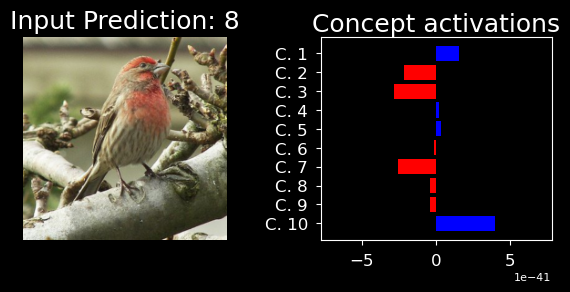

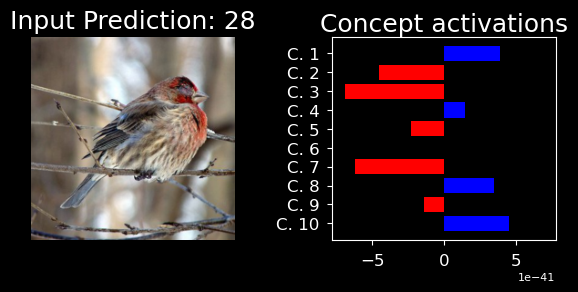

In [8]:
save_path = graph_folder + 'ax/'
show_explainations(Model, test_loader, num_class, device, save_path)

In [9]:
# save_path = graph_folder + 'prototypes/act.png'
# show_prototypes(Model, test_loader, num_class, device, save_path, 'activation' )

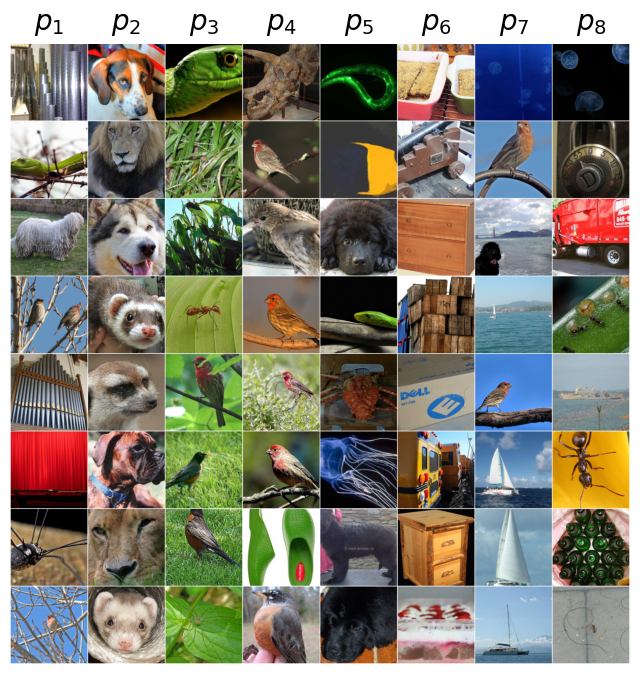

In [10]:
save_path = graph_folder + 'prototypes/act.png'
show_prototypes(Model, train_loader, num_class, device, save_path, 'contrast')